# Practical Machine Learning with Python: Regression

**Goal**:
Use a numerical dataset to demonstrate the process of building a machine learning model with regression.

_*List of Topics*_:
1. Load the test dataset and start exploring the dataset
2. Visualize and further explore the dataset
3. Preparing the dataset for machine learning
4. Building a linear regression model
5. Model tuning

_*Summary of Python libraries used in this lesson*_:
+ pandas: data reading and building data structures
+ matplotlib and seaborn: data visualization
+ sklearn: machine learning algorithms
+ numpy: math calculations
+ itertools: iteration calculations for combinations

## Introduction

Types of machine learning problems:
1. **Supervised learning**: dataset consisted of input (X) and output (Y) variables.
    1. Regression: when the desired output is one or more numerical and continuous variables
    2. Classfication: when response variable is categorical or discrete
2. **Unsupervised learning**: dataset consisted only the input (X) without output or response variables. The goal of the learning is to discover similar relationships (clustering), density estimation, dimensionality reduction.

The main focus on this module is regression with supervised learning.

General steps of machine learning:
+ Step 1: Import the needed libraries
+ Step 2: Instantiate the model with initial tuning parameters
+ Step 3: Fit the model with trainig data
+ Step 4: Predict response with test data
+ Step 5: Evaluate the model, tune parameters, predict new observations

## Load the USC Advertising dataset and explore the dataset

In [1]:
import pandas as pd
url = "http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"
ad = pd.read_csv(url, index_col=0)   ##reseting index to 1 using col 0

ParserError: Error tokenizing data. C error: Expected 1 fields in line 80, saw 3


In [ ]:
print(ad.shape)

(200, 4)


In [ ]:
print(ad.head())

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


Sales numbers are in units of sale while all other variables are in thousand U.S. dollars.

In [ ]:
print(ad.tail())

        TV  Radio  Newspaper  Sales
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4


In [ ]:
print(ad.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


## Visualize and Explore the dataset

In [ ]:
import seaborn as sb
%matplotlib inline

First explore if there are any correlations between any pairs of the variables.

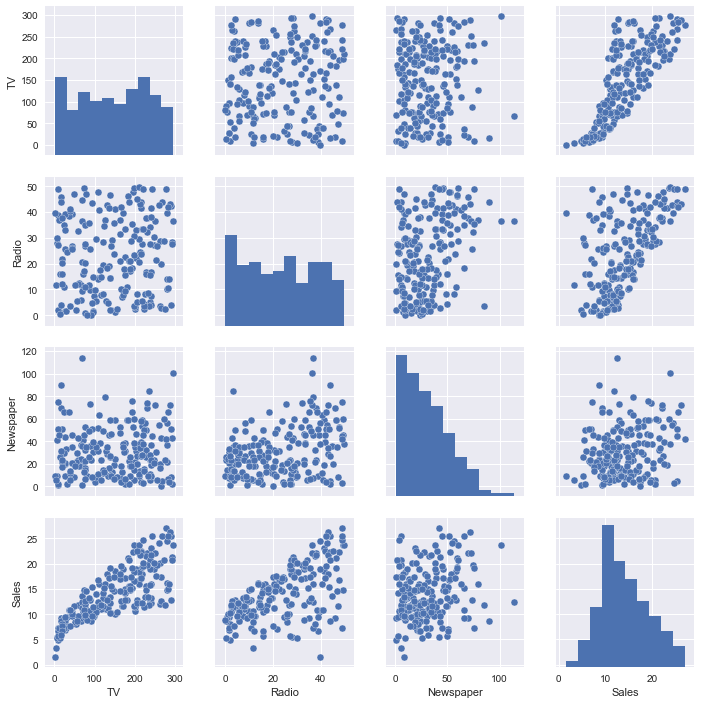

In [ ]:
sb.set(color_codes=True)
sb.pairplot(ad);

There is a lot of info. If we are only interested in the relationships between features (TV, Radio, Newspapers) and response variable (Sales), we can slim down the plots by specifying x_vars and y_vars to include only the variables of interest. Then we can increase the size the plots and relative height (aspect ratio). Lastly we can print a linear regression line with a confidence band.

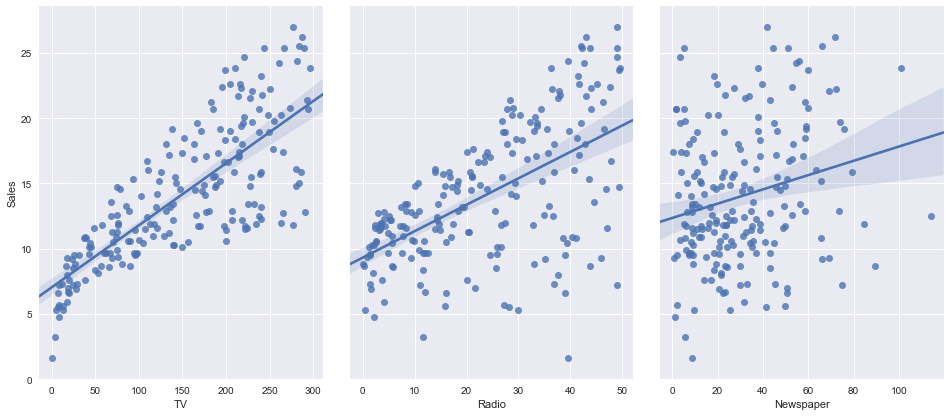

In [ ]:
sb.pairplot(ad, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], size=6, aspect=.75, kind='reg');

It appears there is a stong linear relationship between TV or Radio with sales. The relationship between newspaper and sales is very weak.

## Create a test dataset and a training dataset

First need to prepare the features matrix and response vector. Use column header to break up the dataset.

In [ ]:
X = ad[['TV', 'Radio', 'Newspaper']]
Y = ad['Sales']

In [ ]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [ ]:
Y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

Use sklearn train_test_split function to randomly split the dataset into train sub-dataset and test sub-dataset This function takes the original X and Y with a test size and a random seed, returns X for training and test and Y for training and test. The training dataset will be used to build a model while the test dataset will be used for model validation.

In [ ]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=7)

In [ ]:
print X_train.shape, X_test.shape

(150, 3) (50, 3)


In [ ]:
print Y_train.shape, Y_test.shape

(150L,) (50L,)


## Perform machine learning using linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
LinearReg = LinearRegression()
LinearReg.fit(X_train, Y_train);

Print the estimated (shown with a trailing underscore) parameters.

In [ ]:
print LinearReg.intercept_

2.71863126437


In [ ]:
print LinearReg.coef_

[ 0.04685386  0.18792746]
0.0468538556884


To associate column names with coefficients using Python's zip function:

In [ ]:
zip(X.columns.values, LinearReg.coef_)

[('TV', 0.046854392289391832),
 ('Radio', 0.18794835899150733),
 ('Newspaper', -4.2218159418401279e-05)]

Compute R squared:

In [ ]:
LinearReg.score(X_test, Y_test)

0.90441507239539531

Compute root mean square error (RMSE) using metrics.mean_squared_error():

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
LinearReg_pred = LinearReg.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, LinearReg_pred))
print rmse

NameError: name 'LinearReg' is not defined

## Linear Model Tuning
In this section, we will try to tune the model to see if we can further optimize it.

### Manual tuning

From previous plotting, it appears that Newspaper has very week correlation with Sales. Let's try to remove it from the feature X and rebuild the model.

In [ ]:
X = ad[['TV', 'Radio']]
Y = ad['Sales']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=7)
LinearReg = LinearRegression()
LinearReg.fit(X_train, Y_train);

Compute R squared: 

In [ ]:
LinearReg.score(X_test, Y_test)

0.90440969070016219

Compute root mean square error (RMSE):

In [ ]:
LinearReg_pred = LinearReg.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, LinearReg_pred))
print rmse

1.56931297956


### Tuning for all feature combinations

Create all of the combinations of features.

In [ ]:
from itertools import combinations
input = ['TV', 'Radio', 'Newspaper']
output = sum([map(list, combinations(input, i)) for i in range(len(input) + 1)], [])
output.pop(0)                  ##remove the first empty element
print output

[['TV'], ['Radio'], ['Newspaper'], ['TV', 'Radio'], ['TV', 'Newspaper'], ['Radio', 'Newspaper'], ['TV', 'Radio', 'Newspaper']]


Compute R squared and RMSE for each feature combination.

In [ ]:
Y = ad['Sales']
result = pd.DataFrame()                        ##create an empty data frame
for c in output:
    X = ad[c]
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=7)
    LinearReg = LinearRegression()
    LinearReg.fit(X_train, Y_train);
    R2=LinearReg.score(X_test, Y_test)
    LinearReg_pred = LinearReg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, LinearReg_pred))
    c1 = '_'.join(c)                                              ##convert list to string for plotting later, with underscore
    addrow = [[c1, R2, rmse]]
    result = result.append(addrow, ignore_index=True)

##change col names
colnames = ['Features', 'R2', 'RMSE']
result.columns = colnames

In [ ]:
print result

             Features        R2      RMSE
0                  TV  0.652211  2.993373
1               Radio  0.377476  4.004800
2           Newspaper  0.007527  5.056638
3            TV_Radio  0.904410  1.569313
4        TV_Newspaper  0.680423  2.869394
5     Radio_Newspaper  0.374342  4.014865
6  TV_Radio_Newspaper  0.904415  1.569269


From this table, we can see that two best solutions are TV_Radio and TV_Radio_Newspaper with highest R squared and lowest RMSE. Between the two, there is minimal difference. From a practical point of view, because newspaper advertising adds little to the sales, it would be better to select TV and Radio as the features, without Newspapers. Thus the final linear model is:

In [ ]:
print "Sales = ", LinearReg.intercept_, " + " , LinearReg.coef_[0], "TV + " , LinearReg.coef_[1], " Radio" 

Sales =  2.7178841107  +  0.0468538556884 TV +  0.187927459268  Radio


We can also visualize the R2 and RMSE by plotting them out.

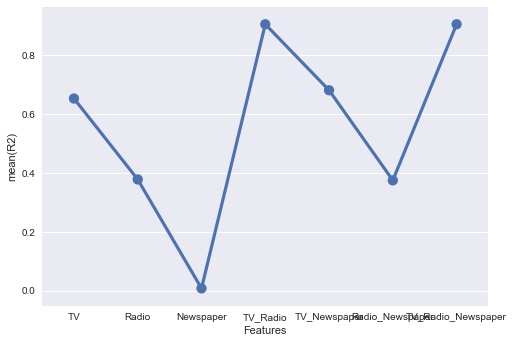

In [ ]:
import seaborn as sb
plota = sb.pointplot(x="Features", y="R2", data=result)

The x-axis label is overlapping, so we need to increase the plot size. Also seaborn allows us to change font size and line width. Setting the context to poster makes the plot easier to view. Other optons of context are notebook (default), paper, and talk.

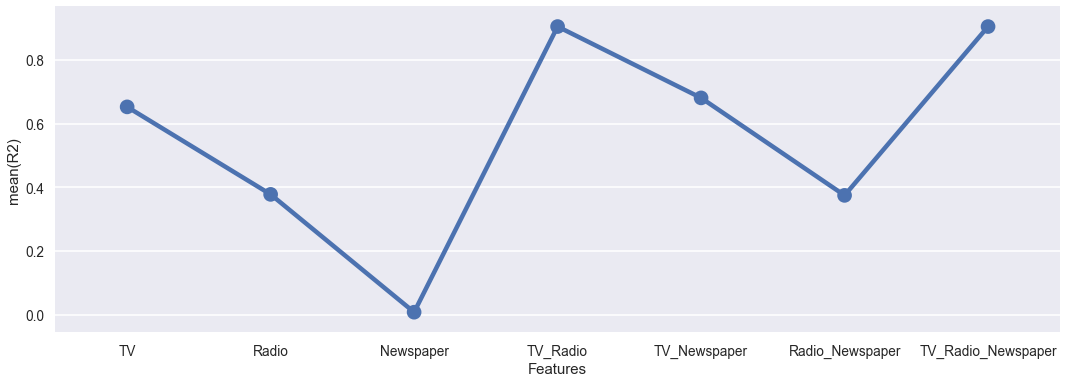

In [ ]:
import matplotlib.pyplot as plt                                          ##plt needed for figure context change
sb.set_context("poster", font_scale=0.85, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(18, 6))
sb.pointplot(x="Features", y="R2", data=result);

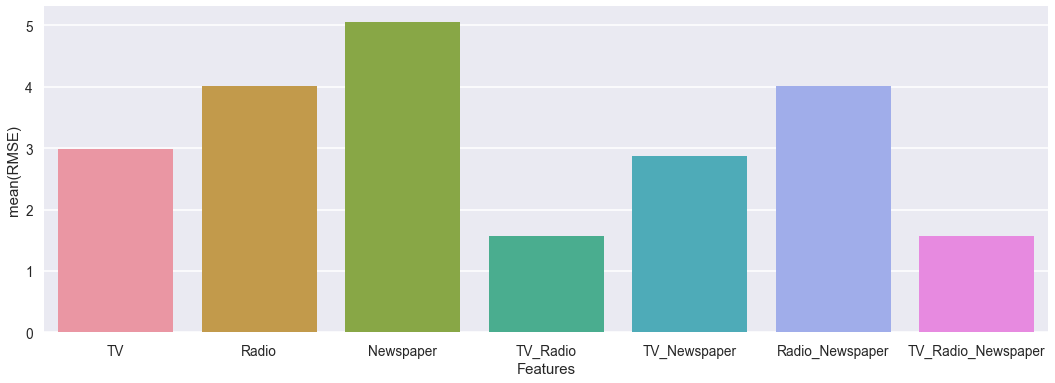

In [ ]:
sb.set_context("poster", font_scale=0.85)                  ##context needs to be set for each plot to change the defaults
plt.figure(figsize=(18, 6))
sb.barplot(x="Features", y="RMSE", data=result);

## Additional Regression Models

### Random Forest Regressor
It is an ensemble learning method that uses multitudes of decision trees. Final prediction is the mean of all tree predictions. In constrast, decision trees alone tend to overfit a model. By definition, decision tree based models do not have a regresion equation.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
from sklearn.ensemble import RandomForestRegressor
##init RF with some variables, n_estimators is number of trees
RFReg = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
RFReg.fit(X_train, Y_train);
R2=RFReg.score(X_test, Y_test)
RFReg_pred = RFReg.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, RFReg_pred))

In [ ]:
print R2, rmse

0.984330725098 0.635370553299


### K Nearest Neighbor Regressor
Use the mean of K nearest neighbors.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
##init K (default to 5)
KNNReg = KNeighborsRegressor(n_neighbors=2)
KNNReg.fit(X_train, Y_train);
R2=KNNReg.score(X_test, Y_test)
KNNReg_pred = KNNReg.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, KNNReg_pred))

In [ ]:
print R2, rmse

0.966763087224 0.925364792933


### Neural Networks Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor
NNReg = MLPRegressor()
NNReg.fit(X_train, Y_train);
R2=NNReg.score(X_test, Y_test)
NNReg_pred = NNReg.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, NNReg_pred))

In [ ]:
print R2, rmse

0.729652214631 2.63914979808
